In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./input/DOSE_V2.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46797 entries, 0 to 46796
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿country               46797 non-null  object 
 1   region                   46732 non-null  object 
 2   GID_0                    46797 non-null  object 
 3   GID_1                    46758 non-null  object 
 4   year                     46797 non-null  int64  
 5   grp_lcu                  44109 non-null  float64
 6   pop                      44457 non-null  float64
 7   grp_pc_lcu               46443 non-null  float64
 8   ag_grp_pc_lcu            34965 non-null  float64
 9   man_grp_pc_lcu           34991 non-null  float64
 10  serv_grp_pc_lcu          34983 non-null  float64
 11  grp_pc_usd               46797 non-null  float64
 12  ag_grp_pc_usd            35260 non-null  float64
 13  man_grp_pc_usd           35286 non-null  float64
 14  serv_grp_pc_usd       

In [4]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")

In [5]:
df.columns

Index(['ï»¿country', 'region', 'GID_0', 'GID_1', 'year', 'grp_lcu', 'pop',
       'grp_pc_lcu', 'ag_grp_pc_lcu', 'man_grp_pc_lcu', 'serv_grp_pc_lcu',
       'grp_pc_usd', 'ag_grp_pc_usd', 'man_grp_pc_usd', 'serv_grp_pc_usd',
       'grp_pc_lcu_2015', 'ag_grp_pc_lcu_2015', 'man_grp_pc_lcu_2015',
       'serv_grp_pc_lcu_2015', 'grp_pc_usd_2015', 'ag_grp_pc_usd_2015',
       'man_grp_pc_usd_2015', 'serv_grp_pc_usd_2015', 'grp_pc_lcu2015_usd',
       'ag_grp_pc_lcu2015_usd', 'man_grp_pc_lcu2015_usd',
       'serv_grp_pc_lcu2015_usd', 'cpi_2015', 'deflator_2015', 'fx', 'PPP',
       'StructChange', 'version', 'T_a', 'P_a'],
      dtype='object')

In [6]:
df.drop(['grp_lcu', 'grp_pc_lcu', 'ag_grp_pc_lcu', 'man_grp_pc_lcu', 'serv_grp_pc_lcu', 'ag_grp_pc_usd', 'man_grp_pc_usd', 'serv_grp_pc_usd',
       'grp_pc_lcu_2015', 'ag_grp_pc_lcu_2015', 'man_grp_pc_lcu_2015',
       'serv_grp_pc_lcu_2015', 'grp_pc_usd_2015', 'ag_grp_pc_usd_2015',
       'man_grp_pc_usd_2015', 'serv_grp_pc_usd_2015', 'grp_pc_lcu2015_usd',
       'ag_grp_pc_lcu2015_usd', 'man_grp_pc_lcu2015_usd',
       'serv_grp_pc_lcu2015_usd', 'deflator_2015', 'fx', 'PPP',
       'StructChange', 'version', 'T_a', 'P_a'], axis=1, inplace=True)

In [7]:
df.columns

Index(['ï»¿country', 'region', 'GID_0', 'GID_1', 'year', 'pop', 'grp_pc_usd',
       'cpi_2015'],
      dtype='object')

In [8]:
df.describe()

,year,pop,grp_pc_usd,cpi_2015
count,46797.000000,4.445700e+04,46797.000000,46725.000000
mean,2000.012693,4.406061e+06,10341.154600,59.336593
std,14.456309,1.229004e+07,15318.916572,43.185624
min,1953.000000,1.811000e+03,0.481648,0.426788
25%,1992.000000,4.062050e+05,1149.878360,19.047580
50%,2003.000000,1.093247e+06,3745.461407,52.545115
75%,2012.000000,2.785248e+06,12615.233010,100.000000
max,2020.000000,2.279430e+08,208930.812200,209.268157


In [9]:
df.drop(['year'], axis=1, inplace=True)

In [10]:
df.columns

Index(['ï»¿country', 'region', 'GID_0', 'GID_1', 'pop', 'grp_pc_usd',
       'cpi_2015'],
      dtype='object')

In [12]:
df.drop(['ï»¿country', 'region', 'GID_0', 'GID_1'], axis=1, inplace=True)
corr_matrix = df.corr()
corr_matrix

,pop,grp_pc_usd,cpi_2015
pop,1.000000,-0.076497,-0.102024
grp_pc_usd,-0.076497,1.000000,0.412538
cpi_2015,-0.102024,0.412538,1.000000


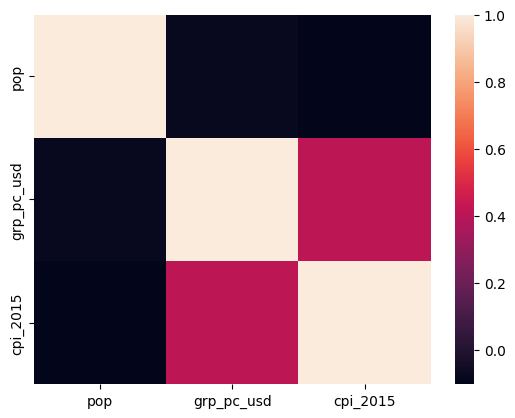

In [13]:
sns.heatmap(corr_matrix)
plt.show()

In [14]:
x1 = df['pop']
x2 = df['cpi_2015']
y = df['grp_pc_usd']

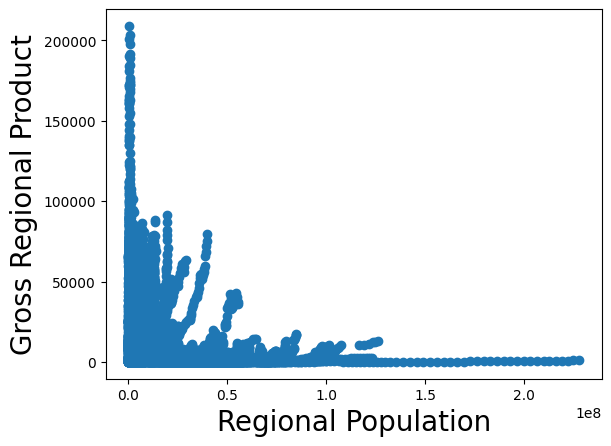

In [16]:
plt.scatter(x1,y)
plt.xlabel('Regional Population', fontsize=20)
plt.ylabel('Gross Regional Product', fontsize=20)
plt.show()

In [17]:
import statsmodels.api as sm

In [22]:
for col in df.columns:
    if df[col].isna().any():
        mode = df[col].mode()[0]
        df[col] = df[col].fillna(mode)

In [32]:
factor = sm.add_constant(df['pop'])
results = sm.OLS(y, factor).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             grp_pc_usd   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     228.4
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.80e-51
Time:                        16:59:23   Log-Likelihood:            -5.1726e+05
No. Observations:               46797   AIC:                         1.035e+06
Df Residuals:                   46795   BIC:                         1.035e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04     74.836    143.172      0.000    1.06e+04    1.09e+04
pop        -8.887e-05   5.88e-06    -15.111      0.000      -0.000   -7.73e-05
==============================================================================
Omnibus:                    30492.205   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496404.949
Skew:                           2.919   Prob(JB):                         0.00
Kurtosis:                      17.849   Cond. No.                     1.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
factor = sm.add_constant(df['cpi_2015'])
results = sm.OLS(y, factor).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             grp_pc_usd   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     9564.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:01:02   Log-Likelihood:            -5.1303e+05
No. Observations:               46797   AIC:                         1.026e+06
Df Residuals:                   46795   BIC:                         1.026e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1660.5394    109.738     15.132      0.000    1445.452    1875.627
cpi_2015     146.1404      1.494     97.797      0.000     143.211     149.069
==============================================================================
Omnibus:                    30710.144   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673898.160
Skew:                           2.830   Prob(JB):                         0.00
Kurtosis:                      20.708   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
multipleFactor = df[['pop', 'cpi_2015']]
x = sm.add_constant(multipleFactor)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             grp_pc_usd   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     4818.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:09:48   Log-Likelihood:            -5.1300e+05
No. Observations:               46797   AIC:                         1.026e+06
Df Residuals:                   46794   BIC:                         1.026e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1896.7846    113.897     16.654      0.000    1673.545    2120.024
pop        -4.143e-05   5.39e-06     -7.685      0.000    -5.2e-05   -3.09e-05
cpi_2015     145.0922      1.500     96.753      0.000     142.153     148.031
==============================================================================
Omnibus:                    30720.234   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673725.312
Skew:                           2.832   Prob(JB):                         0.00
Kurtosis:                      20.704   Cond. No.                     2.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""